# Table of Contents
 <p><div class="lev1 toc-item"><a href="#---     Scatter-plots-in-Lightning" data-toc-modified-id="---&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Scatter-plots-in-Lightning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><img style="float: left" src="http://lightning-viz.org/images/logo.png"> <br> <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Scatter plots in <a href="http://lightning-viz.org/" target="_blank"><font color="#9175f0">Lightning</font></a></a></div><div class="lev2 toc-item"><a href="#-Setup" data-toc-modified-id="-Setup-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><hr> Setup</a></div><div class="lev2 toc-item"><a href="#Connect-to-server" data-toc-modified-id="Connect-to-server-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Connect to server</a></div><div class="lev2 toc-item"><a href="#-Random-points-with-default-styling" data-toc-modified-id="-Random-points-with-default-styling-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><hr> Random points with default styling</a></div><div class="lev2 toc-item"><a href="#-Random-big-purple-points" data-toc-modified-id="-Random-big-purple-points-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span><hr> Random big purple points</a></div><div class="lev2 toc-item"><a href="#-Random-points-with-all-styling-options" data-toc-modified-id="-Random-points-with-all-styling-options-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span><hr> Random points with all styling options</a></div><div class="lev2 toc-item"><a href="#-Clustered-points-with-group-labels" data-toc-modified-id="-Clustered-points-with-group-labels-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span><hr> Clustered points with group labels</a></div><div class="lev2 toc-item"><a href="#-Color-by-value" data-toc-modified-id="-Color-by-value-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span><hr> Color by value</a></div><div class="lev2 toc-item"><a href="#-Fun-with-colors" data-toc-modified-id="-Fun-with-colors-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span><hr> Fun with colors</a></div><div class="lev2 toc-item"><a href="#Axis-labels" data-toc-modified-id="Axis-labels-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Axis labels</a></div>

# <img style='float: left' src="http://lightning-viz.org/images/logo.png"> <br> <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Scatter plots in <a href='http://lightning-viz.org/'><font color='#9175f0'>Lightning</font></a>

## <hr> Setup

In [1]:
from lightning import Lightning

from numpy import random, asarray, sqrt, arctan2, pi, clip
from seaborn import color_palette
from sklearn import datasets
from colorsys import hsv_to_rgb

## Connect to server


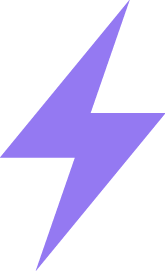

Connected to server at http://public.lightning-viz.org


<IPython.core.display.Javascript object>

In [2]:
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')

## <hr> Random points with default styling

In [3]:
n = 100
x = random.randn(n)
y = random.randn(n)
lgn.scatter(x, y)

## <hr> Random big purple points

Style options like `color` and `size` can be passed a single value, which affects all points

In [4]:
n = 100
x = random.randn(n)
y = random.randn(n)
c = [145,117,240]
s = 18
lgn.scatter(x, y, color=c, size=s)

## <hr> Random points with all styling options

Style options can also be passed as lists with one value per point, either scalars (for `alpha` and `size`) or arrays (for `color`). 
<br>
In this example we also use seaborn's excellent `color_palette` tool to select our colors.

In [5]:
n = 100
x = random.randn(n)
y = random.randn(n)
c = [asarray(color_palette('Blues', 100)[random.choice(range(100))])*255 for i in range(n)]
a = random.rand(n)
s = random.rand(n)*15+8
lgn.scatter(x, y, color=c, alpha=a, size=s)

## <hr> Clustered points with group labels

Instead of specifying colors directly as rgb, you can specify labels (or group assignments).
<br>
Here we use `scikitlearn` to generate clusters and then color according to cluster label.

In [6]:
d, g = datasets.make_blobs(n_features=2, n_samples=200, centers=5, cluster_std=2.0, random_state=100)
x = d[:, 0]
y = d[:, 1]
lgn.scatter(x, y, group=g, alpha=0.8, size=12)

## <hr> Color by value

We can color points by a numerical value by passing that value, and a Colorbrewer colormap.

In [7]:
n = 200
x = random.randn(n)
y = random.randn(n)
v = random.rand(n)
lgn.scatter(x, y, values=v, alpha=0.6, colormap='YlOrRd')

## <hr> Fun with colors

We can use geometry to set colors based on point position and get a pretty result.

In [8]:
n = 200
x = random.randn(n)
y = random.randn(n)
r = map(lambda (x, y): sqrt(x ** 2 + y ** 2), zip(x,y))
t = map(lambda (x, y): arctan2(x, y), zip(x,y))
c = map(lambda (r, t): asarray(hsv_to_rgb(t / (2 * pi), r, 0.9))*255, zip(r, t))
s = asarray(r) * 10 + 2
lgn.scatter(x, y, color=c, size=s, alpha=0.6)

## Axis labels

We can add axis labels by providing extra arguments

In [9]:
x = random.randn(100)
y = random.randn(100)

lgn.scatter(x, y, xaxis='my axis label 1', yaxis='my axis label 2')